In [0]:
from google.colab import drive,files

In [5]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
# Imports go here
import pickle
import numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# dir path
datadirpath = 'gdrive/My Drive/DL Project/Data/ready_chinese_food'
labeldirpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngreLabel.txt'
IngredientList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientList.txt'
IngredientTypeSheet = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientType.xlsx'

trainlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'
vallistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/VAL.txt'
testlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TE.txt'

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'

credentialFile = 'gdrive/My Drive/DL Project/Credentials/Food-Ingredient-cred.json'
#pickleModelC_IngFood.pkl
#Models Pickled
pickleModelA1_IngFood = 'gdrive/My Drive/DL Project/PickleFiles/pickleModelA1_IngFood.pkl'

pickletraindata_X_new= 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_balancedfull.pkl'

pickletraindata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y1full.pkl'

pickletraindata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y2full.pkl'

pickletraindata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y3full.pkl'



In [8]:
'''train_X = pickle.load(open(pickletraindata_X_new,'rb'))
train_Y1 = pickle.load(open(pickletraindata_Y1_new,'rb'))
train_Y2 = pickle.load(open(pickletraindata_Y2_new,'rb'))
train_Y3 = pickle.load(open(pickletraindata_Y3_new,'rb'))'''

"train_X = pickle.load(open(pickletraindata_X_new,'rb'))\ntrain_Y1 = pickle.load(open(pickletraindata_Y1_new,'rb'))\ntrain_Y2 = pickle.load(open(pickletraindata_Y2_new,'rb'))\ntrain_Y3 = pickle.load(open(pickletraindata_Y3_new,'rb'))"

In [0]:
#len(train_X),len(train_X[0]),len(train_X[0][0]),len(train_X[0][0][0]),len(train_X[0][0][0][0]),len(train_Y1),len(train_Y2),len(train_Y3)

Loading train_X

In [10]:
train_X = pickle.load(open(pickletraindata_X_new, 'rb' ))
train_X = np.array(train_X)
print(train_X.shape)

(80000, 1, 7, 7, 512)


In [11]:
train_X=train_X.reshape(train_X.shape[0],7,7,512)
print(train_X.shape)

(80000, 7, 7, 512)


Loading train_Y1

In [12]:
train_Y1 = pickle.load(open(pickletraindata_Y1_new, 'rb' ))
train_Y1 = np.array(train_Y1)
print(train_Y1.shape)

(80000, 172)


Loading train_Y2

In [13]:
train_Y2_list = pickle.load(open(pickletraindata_Y2_new, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(80000, 353)


Loading val_X

In [14]:
val_X = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X)
print(val_X.shape)

(11016, 1, 7, 7, 512)


In [15]:
val_X=val_X.reshape(val_X.shape[0],7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


Loading val_Y1

In [16]:
val_Y1 = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1)
print(val_Y1.shape)

(11016, 172)


Loading val_Y2

In [17]:
val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [18]:
# Loading test_X

test_X = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X)

print(test_X.shape)
test_X=test_X.reshape(test_X.shape[0],7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

test_Y3 = pickle.load(open(pickletestdata_Y3,"rb"))
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)
(33154, 353)


In [0]:
train_Y3 = np.array(pickle.load(open(pickletraindata_Y3_new,"rb")))
val_Y3 = pickle.load(open(picklevaldata_Y3,"rb"))


In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val



DCNN for Arichitecture A

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 7, 7, 2048)   9439232     input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 7, 7, 1024)   18875392    conv2d_13[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 4, 4, 1024)   0           conv2d_14[0][0]                  
____________________________________________________________________________________________

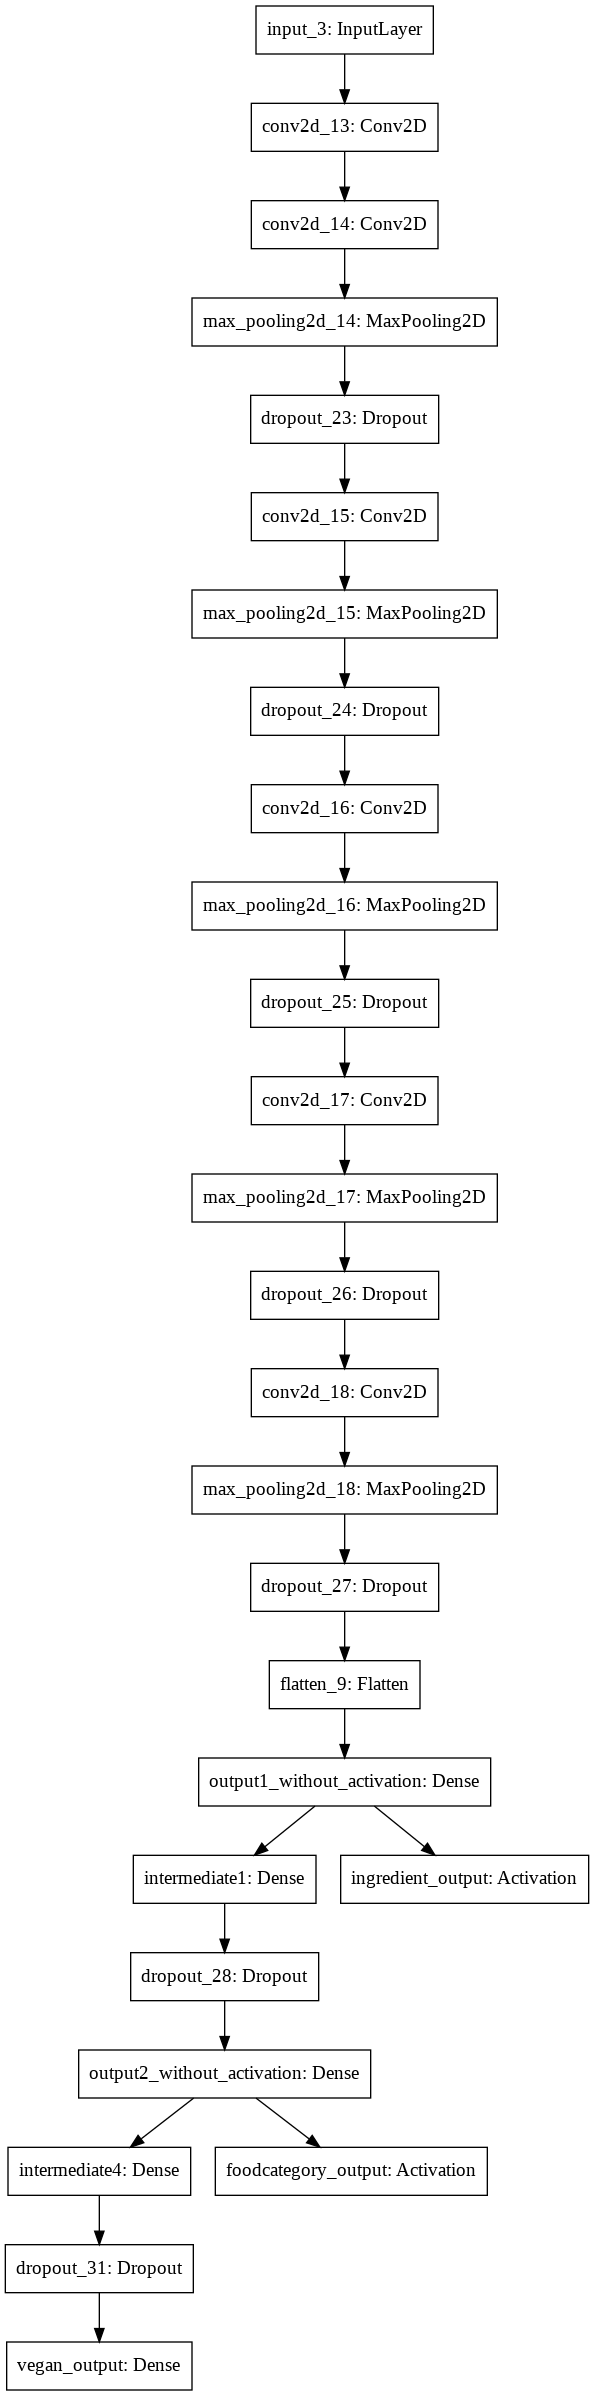

In [32]:
# Model_A1 stacking food categorization on top of ingredient recognition 

inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.3)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.2)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.3)(maxPool2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.2)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened4 = Flatten()(dropout4)
flattened6 = Flatten()(dropout6)

output1_without_activation = Dense(353,activation=None,name='output1_without_activation')(flattened6)  ##  Ingredient recognition
output1 = keras.layers.Activation("sigmoid",name="ingredient_output")(output1_without_activation)

intermediate1 = Dense(512,activation='relu',name='intermediate1')(output1_without_activation) 
dropout7 = Dropout(0.3)(intermediate1)

intermediate2 = Dense(256,activation='relu',name='intermediate2')(dropout7)
dropout8 = Dropout(0.2)(intermediate2)

intermediate3 = Dense(256,activation='relu',name='intermediate3')(dropout8)
dropout9 = Dropout(0.3)(intermediate3)

output2_without_activation = Dense(172,activation=None,name='output2_without_activation')(dropout7) ##  Food categorization
output2 = keras.layers.Activation("softmax",name="foodcategory_output")(output2_without_activation)

intermediate4 = Dense(512,activation='relu',name='intermediate4')(output2_without_activation) 
dropout10 = Dropout(0.3)(intermediate4)

intermediate5 = Dense(256,activation='relu',name='intermediate5')(dropout10)
dropout11 = Dropout(0.2)(intermediate5)

intermediate6 = Dense(64,activation='relu',name='intermediate6')(dropout11)
dropout12 = Dropout(0.3)(intermediate6)

output3 = Dense(1,activation="sigmoid",name='vegan_output')(dropout10) ##  Vegan categorization


model_A1 = Model(inputs=inputs, outputs=[output1,output2,output3]) # Defining model with Architecture A1
print(model_A1.summary()) # summarize layers
plot_model(model_A1, to_file='Multi-task Architecture A1.png') # plot graph

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_A1.compile(optimizer=Adam(lr=0.0005),
              loss={'ingredient_output': 'binary_crossentropy', 'vegan_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])

In [34]:
model_A1.fit(train_X, [train_Y2,train_Y1, train_Y3], batch_size=256, epochs=50,validation_data = (val_X, [val_Y2, val_Y1, val_Y3]))

Train on 80000 samples, validate on 11016 samples
Epoch 1/50
80000/80000 [==============================] - 58s 725us/step - loss: 4.8421 - ingredient_output_loss: 0.2970 - foodcategory_output_loss: 4.3114 - vegan_output_loss: 0.2337 - ingredient_output_get_f1: 0.0199 - ingredient_output_top5_acc: 0.0503 - foodcategory_output_get_f1: 0.0486 - foodcategory_output_top5_acc: 0.1965 - vegan_output_get_f1: 0.8411 - vegan_output_top5_acc: 1.0000 - val_loss: 5.2784 - val_ingredient_output_loss: 0.0774 - val_foodcategory_output_loss: 4.7168 - val_vegan_output_loss: 0.4843 - val_ingredient_output_get_f1: 0.0059 - val_ingredient_output_top5_acc: 0.3386 - val_foodcategory_output_get_f1: 0.0249 - val_foodcategory_output_top5_acc: 0.1491 - val_vegan_output_get_f1: 0.8856 - val_vegan_output_top5_acc: 1.0000
Epoch 2/50
80000/80000 [==============================] - 56s 695us/step - loss: 3.3824 - ingredient_output_loss: 0.0716 - foodcategory_output_loss: 3.2053 - vegan_output_loss: 0.1055 - ingredien

In [35]:
## prediction on test


results = model_A1.evaluate(test_X, [test_Y2,test_Y1,test_Y3], batch_size=128)
#print(results)
print('Ingredient F1:', results[4])
print('Food Top5:', results[7])
print('Vegan F1:', results[8])

print('Generate predictions for all samples')
predictions = model_A1.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
predictions_vegan=1*(predictions[2] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 9s 273us/step
Ingredient F1: 0.43276003796494666
Food Top5: 0.7303794413947035
Vegan F1: 0.8490109932920992
Generate predictions for all samples


In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.74      0.04      0.08      6698
           1       0.62      0.25      0.35       666
           2       0.41      0.03      0.06       731
           3       0.63      0.41      0.50       144
           4       0.67      0.70      0.69       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.63      0.25      0.35       868
           9       0.07      0.04      0.05       365
          10       0.00      0.00      0.00        41
          11       0.64      0.24      0.35       699
          12       0.45      0.10      0.16       387
          13       0.47      0.11      0.18      1639
          14       0.07      0.39      0.12        76
          15       0.80      0.09      0.16      4353
          16       0.40      0.12      0.19      1138
          17       0.57    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [37]:
print(classification_report(test_Y3, predictions_vegan))

              precision    recall  f1-score   support

           0       0.83      0.51      0.63      6666
           1       0.89      0.97      0.93     26488

    accuracy                           0.88     33154
   macro avg       0.86      0.74      0.78     33154
weighted avg       0.88      0.88      0.87     33154

